<a href="https://colab.research.google.com/github/damilojohn/Programming-language-classification-/blob/main/Programming_Language_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers[torch] datasets -qU wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... 

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

In [ ]:
config = {'model name':'distil-bert',
          'learning_rate':'1e-5',
          'architecture' : 'BERT',
          'transformers_version' : '4.22.0',
          'context_length':'512',
          'epochs':10,
          'preprocessing':"replaced double spacing,newlines,tabs with special tokens,"
}

In [ ]:
run = wandb.init(project='Programming_Language_Classification',
           entity='damilojohn',
           name = 'new_tokens',
           config=config
)

wandb: Currently logged in as: damilojohn. Use `wandb login --relogin` to force relogin


In [ ]:
# artifact = wandb.Artifact('programming_lang_classification',type='dataset')
# artifact.add_dir('/content/language_detection')
# run.log_artifact(artifact)

wandb: Adding directory to artifact (/content/language_detection)... Done. 0.1s


<Artifact programming_lang_classification>

In [ ]:
data = run.use_artifact('programming_lang_classification:latest')
directory = data.download(root='/content')

wandb:   4 of 4 files downloaded.  


# Exploring data


In [ ]:
   df = pd.read_csv('/content/train.csv')
except pd.errors.ParserError:
    df = pd.read_csv('/content/train.csv', error_bad_lines=False)

In [ ]:
input_file = '/content/train_modified.csv'
output_file = 'cleaned_file.csv'

with open(input_file, 'r') as f:
    content = f.read()

# Remove or replace EOF characters
cleaned_content = content.replace('\x1a', '')  # Replace EOF character with an empty string

with open(output_file, 'w') as f:
    f.write(cleaned_content)


In [ ]:
train_df = pd.read_csv(r"/content/train.csv",on_bad_lines='warn')
test_df = pd.read_csv(r"/content/test (3).csv")

In [ ]:
train_df.iloc[31098]['code']

'            data[i][j] = _random(centres[class][j] - R, centres[class][j] + R);\n\n         */\n\n     }\n\n }\n\n /** Test that creates a random set of points distributed in 4 clusters in\n\n  * 3D space and trains an SOM that finds the topological pattern. The following\n'

In [ ]:
train_df['language'].unique()

array(['c-sharp', 'javascript', 'c-plus-plus', 'c', 'python', 'ruby',
       'swift', 'java', 'go', 'dart', 'julia', 'f-sharp', 'php', 'R',
       'scala'], dtype=object)

In [ ]:
from collections import Counter
labels = Counter(train_df.language)
labels


Counter({'c-sharp': 3890,
         'javascript': 2701,
         'c-plus-plus': 11277,
         'c': 4565,
         'python': 12678,
         'ruby': 1117,
         'swift': 260,
         'java': 4318,
         'go': 1981,
         'dart': 1023,
         'julia': 1005,
         'f-sharp': 246,
         'php': 260,
         'R': 160,
         'scala': 147})

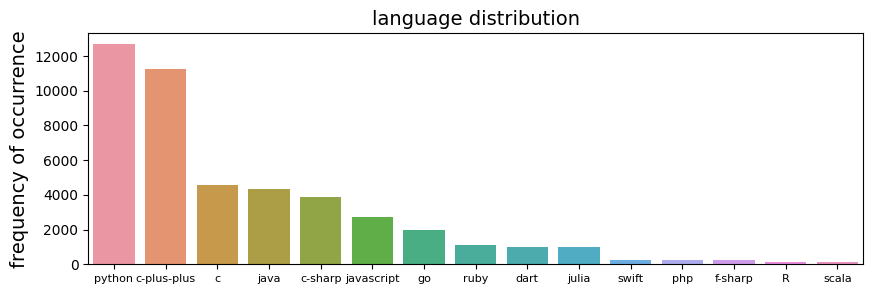

In [ ]:
labels,label_count = zip(*labels.most_common())
plt.figure(figsize=(10,3))
ax = sns.barplot(x=list(labels),y=list(label_count))
ax.set_xticklabels(labels,rotation=0,fontsize=8)
plt.title("language distribution",fontsize=14)
plt.ylabel("frequency of occurrence",fontsize=14)
plt.show()

# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
label_encoding = LabelEncoder().fit(train_df.language)
train_df['target'] = label_encoding.transform(train_df.language)

In [ ]:
label_encoding.classes_

array(['R', 'c', 'c-plus-plus', 'c-sharp', 'dart', 'f-sharp', 'go',
       'java', 'javascript', 'julia', 'php', 'python', 'ruby', 'scala',
       'swift'], dtype=object)

In [ ]:
tags = list(label_encoding.classes_)
tags = {k:j for j,k in enumerate(tags)}
tags

{'R': 0,
 'c': 1,
 'c-plus-plus': 2,
 'c-sharp': 3,
 'dart': 4,
 'f-sharp': 5,
 'go': 6,
 'java': 7,
 'javascript': 8,
 'julia': 9,
 'php': 10,
 'python': 11,
 'ruby': 12,
 'scala': 13,
 'swift': 14}

In [ ]:
import json
with open('/content/labels.json','w') as f:
  json.dump(tags,f)

In [ ]:
artifact = wandb.Artifact('programming_lang_classification',type='dataset')
artifact.add_file('/content/labels.json',name='/programming_lang_classification')

In [ ]:
import re

In [ ]:
new_df = train_df.copy()

In [ ]:
def preprocess_fn(df):
  #replace all numeric values,double spacing,tabs and line breaks with special tokens
  for pattern,repl in [
      [r'(?<!\w)\d+\.\d+(?!\w)', '[FLOAT]'],
      ['  ','[space]'],
      [r'(?<!\w)\d+(?!\w)','[INT]'],
      ['/t',' [tab] '],
      ['/n',' [newline] '],
      ['/s+',' ']]:
      df['code'] = df['code'].apply(lambda x: re.sub(pattern,repl,x))
  return df


In [ ]:
train_df = preprocess_fn(train_df)
train_df[train_df['code'].str.contains(r'[newline]')]

,id,code,language,target
0,14026,var result = testObj1 | testObj2;\n\n[SPACE][S...,c-sharp,3
1,12201,///[SPACE][SPACE] Initializes a new instance o...,c-sharp,3
2,17074,/*\n\n[SPACE][SPACE] Explanation :- a user giv...,javascript,8
3,21102,int sum = [INT];\n\n[SPACE][SPACE][SPACE][SPAC...,c-plus-plus,2
4,53065,if (p->data < min)\n\n[SPACE][SPACE][SPACE][SP...,c,1
...,...,...,...,...
45623,77158,check = [INT]\n\n[SPACE][SPACE] x = len(coordi...,python,11
45624,19972,self.fib_array.append([INT])\n\n[SPACE][SPACE]...,python,11
45625,45356,do {\n\n[SPACE][SPACE][SPACE][SPACE] std::cout...,c-plus-plus,2
45626,20558,package Sorts;\n\n import java.util.Arrays;\n\...,java,7


In [ ]:
  for pattern,repl in [
      [r'(?<!\w)\d+\.\d+(?!\w)', '[FLOAT]'],
      ['  ','[SPACE]'],
      [r'(?<!\w)\d+(?!\w)','[INT]']]:
      new_df['code'] = new_df['code'].apply(lambda x: re.sub(pattern,repl,x))

In [ ]:
 train_df[train_df['code'].str.contains(r'[NEWLINE]')]['code'].iloc[15]

')\n\n[SPACE][SPACE][SPACE][SPACE][SPACE][SPACE] if new_key is None:\n\n[SPACE][SPACE][SPACE][SPACE][SPACE][SPACE][SPACE][SPACE] break'

In [ ]:
  for pattern,repl in [
      [r'/t',' [TAB] '],
      [r'/n',' [NEWLINE] '],
      [r'/s+',' ']]:
      train_df['code'] = train_df['code'].apply(lambda x: x.replace(pattern,repl,))

In [ ]:
x_train,y_train = train_df['code'],train_df['target']

In [ ]:
train_df = preprocess_fn(train_df)

In [ ]:
train_df['code'].iloc[2235]

'* @returns `void`\n\n */\n\n static void test()\n\n {'

In [ ]:
x_test = test_df['code']

In [ ]:
#creating a validation set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=12)

In [ ]:
x_train.shape,x_val.shape,

((36502,), (9126,))

# Using a Multinomial Naive Bayes Classifier



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

In [ ]:
classifier = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
classifier = classifier.fit(x_train, y_train)

In [ ]:
classifier

In [ ]:
print("f1 score: ",f1_score(y_val,classifier.predict(x_val),average='macro'))
print("accuracy : ",accuracy_score(y_val,classifier.predict(x_val))*100)

f1 score:  0.33830945646743504
accuracy :  66.07495069033531


# Finetuning BERT

In [ ]:
from transformers import BertModel,BertTokenizer
from transformers import AutoModelForSequenceClassification
from datasets import Dataset,DatasetDict
import torch
from transformers import Trainer,TrainingArguments
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

In [ ]:
train_df,val_df = train_test_split(train_df,random_state=12,stratify=train_df.language,test_size=0.2)

In [ ]:
train_df

,id,code,language,target
22067,66996,"index := strings.IndexRune(p.key, char)\n\n \t...",go,6
37358,16301,"""""""\n\n[SPACE][SPACE] images = []\n\n[SPACE][S...",python,11
830,14372,// get last element that insert into stack\n\n...,go,6
43192,13533,bool isEndofWord = false;[SPACE]///< identifie...,c-plus-plus,2
44856,32433,state = pt\n\n[SPACE][SPACE] if pt:\n\n[SPACE]...,python,11
...,...,...,...,...
25301,33276,Output: [INT]\n\n Explanation:\n\n Subset1 = {...,java,7
22486,11738,# If we list all the natural numbers below [IN...,ruby,12
25373,89285,(*lazy)[pos] = [INT];\n\n[SPACE][SPACE] }\n\n[...,c-plus-plus,2
21645,70931,"if y[::-[INT]][j] == ""[INT]"":\n\n[SPACE][SPACE...",python,11


In [ ]:
train = Dataset.from_pandas(train_df)
val = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)
dataset = DatasetDict()
dataset['train'] = train
dataset['val'] = val

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'code', 'language', 'target', '__index_level_0__'],
        num_rows: 36502
    })
    val: Dataset({
        features: ['id', 'code', 'language', 'target', '__index_level_0__'],
        num_rows: 9126
    })
})

In [ ]:
tokenizer = BertTokenizer.from_pretrained("distilbert-base-uncased",padding='max_length',truncation=True,max_length=512)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=len(labels))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#manually adding a classifier head on the transformer
class LanguageClassifier(BertModel):
  def __init__(self,num_labels,):
    pass

In [ ]:
def preprocess_function(sample):
  inputs = tokenizer(sample['code'],padding='max_length',truncation=True,max_length=256)
  outputs = sample['target']
  sample['input_ids'] = inputs.input_ids
  sample['attention_mask'] = inputs.attention_mask
  sample['labels'] = outputs
  return sample

In [ ]:
tokenized_dataset = dataset.map(preprocess_function,batched=True,batch_size=120)

Map:   0%|          | 0/36502 [00:00<?, ? examples/s]

Map:   0%|          | 0/9126 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset.set_format(
    type="torch", columns=["input_ids", "attention_mask","labels"],
)

In [ ]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels,preds,average='weighted')
  acc = accuracy_score(labels,preds)
  return {'accuracy':acc,"f1":f1}




In [ ]:
batch_size=32
logging_steps = len(dataset['train']) // batch_size
training_args = TrainingArguments(output_dir='bert_classifier',
                                  num_train_epochs=10,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  evaluation_strategy="epoch",
                                  save_strategy='epoch',
                                  fp16=True,
                                  report_to ='wandb',
                                  weight_decay=0.1
                                  )

In [ ]:
trainer = Trainer(
    model = model,
    args= training_args,
    train_dataset= tokenized_dataset['train'],
    eval_dataset = tokenized_dataset['val'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.319100,0.309078,0.893272,0.891799
2,0.216500,0.272705,0.906421,0.904954
3,0.154000,0.292319,0.904558,0.905641
4,0.112100,0.296176,0.915626,0.915170
5,0.085400,0.319211,0.918146,0.918385
6,0.066200,0.339036,0.918146,0.918792
7,0.058100,0.350010,0.925159,0.924915
8,0.045100,0.362053,0.922200,0.922478
9,0.043000,0.361684,0.925488,0.925334
10,0.037100,0.359066,0.926583,0.926539


Epoch,Training Loss,Validation Loss


TrainOutput(global_step=11410, training_loss=0.11525265829903739, metrics={'train_runtime': 2819.8195, 'train_samples_per_second': 129.448, 'train_steps_per_second': 4.046, 'total_flos': 2.448048319824384e+16, 'train_loss': 0.11525265829903739, 'epoch': 10.0})

In [ ]:
artifact = wandb.Artifact('Language_Classification_dBERT',type='model')
artifact.add_dir('/content/bert_classifier/')
run.log_artifact(artifact)

NameError: ignored

In [ ]:
#using logged model artifacts
with wandb.init(project="Programming_Language_Classification") as run:

  # Connect an Artifact to the run
  my_model_name = "damilojohn/Programming_Language_Classification/Language_Classification:v1"
  my_model_artifact = run.use_artifact(my_model_name,type='model')

  # Download model weights to a folder and return the path
  model_dir = my_model_artifact.download()

  #  using the same model class
  model = AutoModelForSequenceClassification.from_pretrained(
      model_dir,)

wandb: Downloading large artifact Language_Classification:v0, 1253.53MB. 10 files... 
wandb:   10 of 10 files downloaded.  
Done. 0:0:22.4


In [ ]:
text = '' #enter code snippet here
labels =
input_ids = tokenizer(text,padding='max_length',max_length=256,truncation=True)


In [ ]:
def preprocess_test(data):
  inputs = tokenizer(data,padding='max_length',max_length=512,truncation=True,return_tensors='pt')
  input_ids = inputs.input_ids
  attention_mask = inputs.attention_masks
  data['input_ids'] = input_ids
  data['attention_mask'] = attention_mask
  return data

In [ ]:
tokenized_test = test.map(preprocess_test,batched=True,batch_size=128)

In [ ]:
val_pred = trainer.predict(tokenized_dataset['val'])
val_pred.metrics

{'test_loss': 0.3590658903121948,
 'test_accuracy': 0.9265833881218497,
 'test_f1': 0.926538580505055,
 'test_runtime': 20.7517,
 'test_samples_per_second': 439.771,
 'test_steps_per_second': 13.782}

In [ ]:
test_pred = trainer.predict(tokenized_test)
test_pred.metrics

In [ ]:
code_snippets = [
    '''
    def factorial(n):
        if n == 0:
            return 1
        else:
            return n * factorial(n-1)
    ''',

    '''
    function fibonacci(n) {
        if (n <= 1) return n;
        return fibonacci(n - 1) + fibonacci(n - 2);
    }
    ''',

    '''
    public class HelloWorld {
        public static void main(String[] args) {
            System.out.println("Hello, World!");
        }
    }
    ''',

    '''
    #include <iostream>
    using namespace std;

    int main() {
        cout << "Hello from C++!" << endl;
        return 0;
    }
    ''',

    '''
    using System;

    class Program {
        static void Main(string[] args) {
            Console.WriteLine("Hello C#!");
        }
    }
    ''',

    '''
    def greet(name):
        puts "Hello, #{name}!"
    end
    ''',

    '''
    <?php
    function hello() {
        echo "Hello, PHP!";
    }
    ?>
    ''',

    '''
    func greet(_ name: String) {
        print("Greetings, \(name)!")
    }
    ''',

    '''
    fun main() {
        println("Hello from Kotlin!")
    }
    ''',

    '''
    fn main() {
        println!("Rust says hello!");
    }
    '''
]
labels = ['Python', 'JavaScript', 'Java', 'C++', 'C#', 'Ruby', 'PHP', 'Swift', 'Kotlin', 'Rust']

In [ ]:
model.eval()
for i,text in enumerate(code_snippets):
  print(text[i])
  label = labels
  print('true value ',label[i])
  input = tokenizer(text,return_tensors='pt',padding='max_length',max_length=512,truncation=True)
  output = model(**input.to('cuda')).logits
  output = torch.argmax(output,dim=-1)
  print(output)
  print('prediction:',label_encoding.inverse_transform([output.cpu()]))




true value  Python


TypeError: ignored

In [ ]:
label_encoding.inverse_transform([output[].cpu()])

IndexError: ignored

In [ ]:
import random
import torch
def test(data):
  print("picking a code sample and predicting it's language")
  idx = random.choice(range(len(test)))
  code_sample = data['code'][idx]
  print("code sample ",code_sample)
  input = tokenizer(code_sample,return_tensors='pt',)
  output = model(**input)
  pred = torch.argmax(output,dim=1)
  return pred


In [ ]:
# using the model as a feature extractor and applying logisitic regression to hidden states


# BERT as a Feature Extractor

In [ ]:
model = BERTModel.from_pretrained('bert-base-uncased'num_labels=len(labels))


In [ ]:
#testing our hidden states extraction
text = "trying to visualize hidden states"
inputs = tokenizer(text,return_tensors='pt')
outputs = model(**inputs)
outputs

In [ ]:
def get_hidden_states(batch):
  inputs = {k:v for k,v in batch.items() if k == 'input_ids' or 'attention_mask'}
  with torch.no_grad():
    #get hidden state from last layer
    last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state":last_hidden_state[:,0]} #return only the CLS token



In [ ]:
final_dataset = tokenized_dataset.map(get_hidden_states,batched=True)

In [ ]:
x_train = np.array(final_dataset['train']['hidden_states'])
y_train = np.array(final_dataset['train']['label'])
x_val = np.array(final_dataset['val']['hidden_states'])
y_val = np.array(final_dataset['val']['labels'])
x_train.shape,x_valid.shape

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisiticRegression

LR_clf = LogisticRegression(max_iter=3000)
LR_clf.fit(x_train,y_train)
lR_clf.score(x_valid,y_valid)